In [101]:
import math
import numpy as np
import pandas as pd
import yfinance as yf # To extract stock price data
import matplotlib.pyplot as plt # For plotting
from sklearn import metrics # For Measuring Accuracy
from sklearn.model_selection import train_test_split # Splitting DataFrames for training then testing
from sklearn.linear_model import LinearRegression # For Linear Regression
plt.style.use('fivethirtyeight')

In [102]:
Ticker = yf.Ticker('NVDA') # Take NVDA data from yahoo finance
history = Ticker.history(period="2y") # Take last 2 years
df=pd.DataFrame(history, columns=['Close'])
# Change into a pandas DataFrame with ONLY getting Close column to prevent Data Leak during Linear Regression Training
df = df.reset_index() # Add index

In [112]:
train, test = train_test_split(df, test_size=0.2)
# Use the first 80% to train using linear regression producing a prediction for the remaining 20%
xForTraining = np.array(train.index).reshape(-1, 1) # 2D Array for .fit()
yForTraining = train['Close']

xForTesting = np.array(test.index).reshape(-1, 1) # 2D Array for .predict()
yForTesting = test['Close']

regression = LinearRegression()
regression.fit(xForTraining, yForTraining) # Training the data
yPredicted = regression.predict(xForTesting) # Creating Predicted Closing Prices

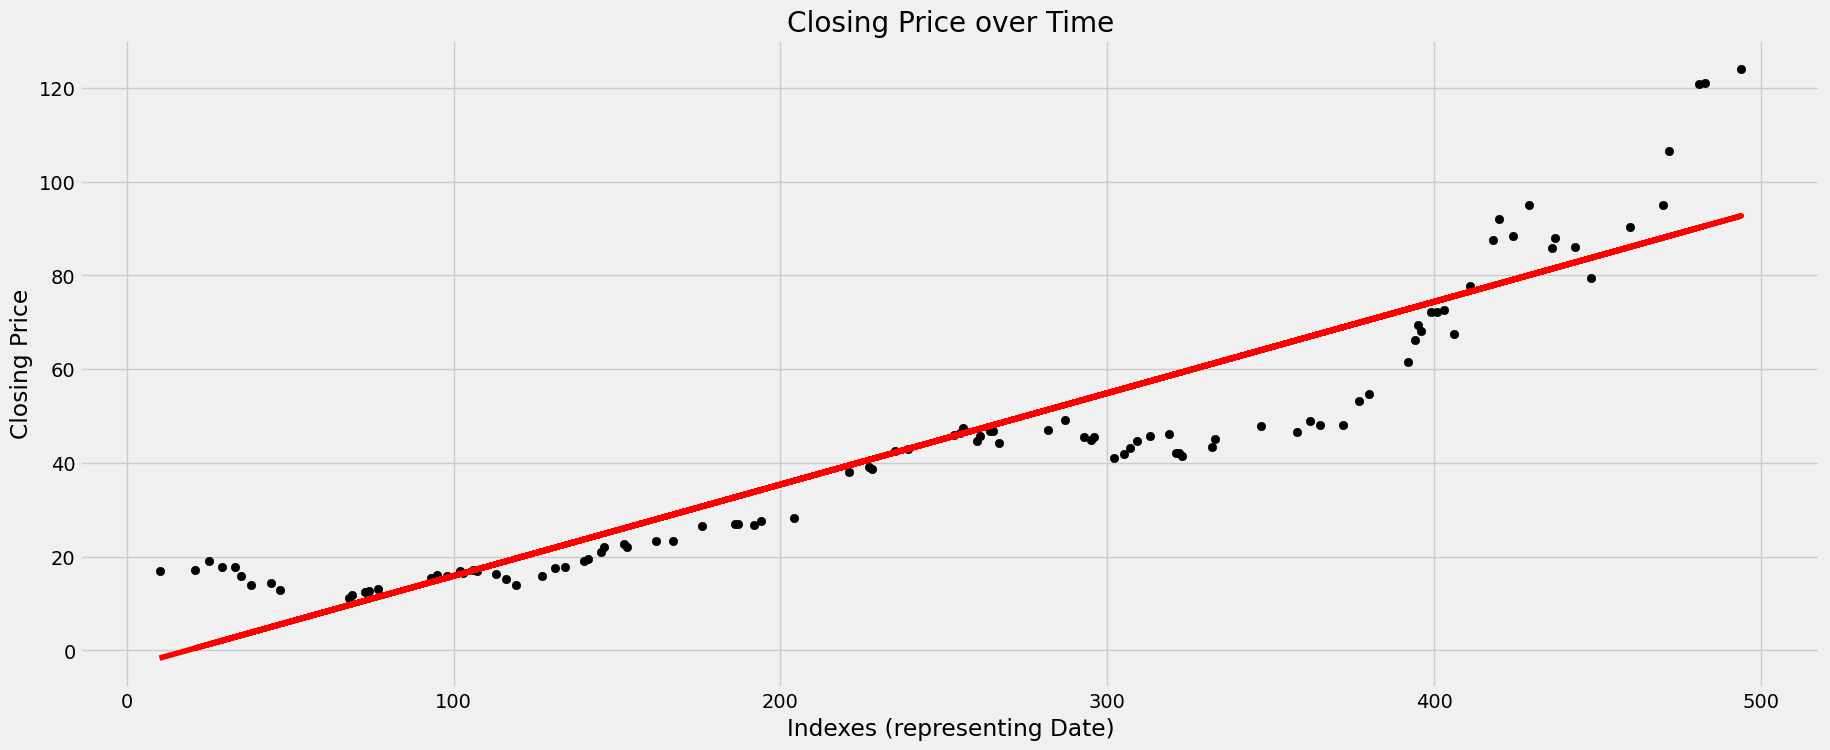

In [116]:
# Plotting result of linear regression

plt.figure(1, figsize=(20,8))
plt.title("Closing Price over Time")
plt.plot(xForTesting, yPredicted, color='red', label='Predicted Closing Price') # y = mx + c line plot
plt.scatter(xForTesting, yForTesting, color='black', label='Actual Closing Price') # Actual Closing Prices scatterplot
plt.xlabel('Indexes (representing Date)')
plt.ylabel('Closing Price')
plt.show()

In [117]:
# Accuracy Measurements
print(f"Regression Confidence = {100*regression.score(xForTesting, yForTesting)}%")
print(f"Mean Squared Error = {metrics.mean_squared_error(yForTesting, yPredicted)}")  
print(f"Root Mean Squared Error = {np.sqrt(metrics.mean_squared_error(yForTesting, yPredicted))}")
print(f"Mean Absolute Error = {metrics.mean_absolute_error(yForTesting, yPredicted)}")
print(f"R-sq = {metrics.r2_score(yForTesting, yPredicted)}")
print(f"Thus, {100*metrics.r2_score(yForTesting, yPredicted)}% of the variance in closing price is predicted by the linear regression model")

Regression Confidence = 84.97684850514855%
Mean Squared Error = 115.22047970751755
Root Mean Squared Error = 10.734080291646674
Mean Absolute Error = 7.967239999121957
R-sq = 0.8497684850514855
Thus, 84.97684850514855% of the variance in closing price is predicted by the linear regression model
